# EDA Exercise - Sephora Products and Skincare Reviews
(https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews/data)


## Dataset Desciption

**About Dataset**

This dataset was collected via Python scraper in March 2023 and contains:

- Information about all beauty products (over 8,000) from the Sephora online store, including product and brand names, prices, ingredients, ratings, and all features.

- User reviews (about 1 million on over 2,000 products) of all products from the Skincare category, including user appearances, and review ratings by other users

**The main goal of this exercise is to practice data prepping and different techniques involved in the EDA process.**

## 1. Import the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Before start, let's download kaggle api and upload it to Colab runtime.**


1.  Navigate to [Kaggle](https://www.kaggle.com/).
2. Select 'Sign In' located at the top right.
3. Choose 'Sign in with Google'.
4. Use either your BU or personal account to continue.
5. After signing in, click on your profile picture at the top right.
6. Select 'Profile', then navigate to and select the 'Account' tab, which is located at the far right.
7. Scroll to find 'API' and then select 'Create New Token'.
8. The kaggle.json file will download automatically.
9. Open the exercise Colab file.
10. In Colab, click on the files icon on the left of the screen to open the Files tab.
11. Select 'Upload to Session Storage' (Icon with an upward arrow on a file).
12. Upload the downloaded kaggle.json file.


Let's first install kaggle package

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download nadyinky/sephora-products-and-skincare-reviews
!unzip sephora-products-and-skincare-reviews.zip

100% 147M/147M [00:06<00:00, 28.9MB/s]
100% 147M/147M [00:06<00:00, 24.2MB/s]
Archive:  sephora-products-and-skincare-reviews.zip
  inflating: product_info.csv        
  inflating: reviews_0-250.csv       
  inflating: reviews_1250-end.csv    
  inflating: reviews_250-500.csv     
  inflating: reviews_500-750.csv     
  inflating: reviews_750-1250.csv    


Use `pd.read_csv` to create five different dataframes for their corresponding csv files.

In [ ]:
product_df = pd.read_csv('product_info.csv', low_memory=False)  # This tells pandas to read more of the file to decide what the types should be. (resolving a warning)
reviews_0_250_df = # YOUR CODE
reviews_250_500_df = # YOUR CODE
reviews_500_750_df = # YOUR CODE
reviews_750_1250_df = # YOUR CODE
reviews_1250_end_df = # YOUR CODE

## 2. Overview of the Data

Use `.head()` function to take a first look at the datasets. Let's see first few rows of `product_df` and `reviews_0_250_df` DataFrames:

In [ ]:
# product_df
# YOUR CODE

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:
# reviews_0_250_df
# YOUR CODE

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


Next, let's check the data types for columns of these two DataFrames:

In [ ]:
# product_df
# YOUR CODE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [ ]:
# reviews_0_250_df
# YOUR CODE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                602130 non-null  int64  
 1   author_id                 602130 non-null  object 
 2   rating                    602130 non-null  int64  
 3   is_recommended            484644 non-null  float64
 4   helpfulness               270298 non-null  float64
 5   total_feedback_count      602130 non-null  int64  
 6   total_neg_feedback_count  602130 non-null  int64  
 7   total_pos_feedback_count  602130 non-null  int64  
 8   submission_time           602130 non-null  object 
 9   review_text               601131 non-null  object 
 10  review_title              435119 non-null  object 
 11  skin_tone                 496074 non-null  object 
 12  eye_color                 463642 non-null  object 
 13  skin_type                 527447 non-null  o

## 3. Merge and Join the Datasets

First, we want to concatenate the five `review` files.

Hint: use `pd.concat`

In [ ]:
dataframes_to_concatenate = [
    reviews_0_250_df,
    reviews_250_500_df,
    reviews_500_750_df,
    reviews_750_1250_df,
    reviews_1250_end_df
]

review_df = # YOUR CODE

Then, we want to join the review dataframe with the product info dataframe on the common attribute `product_id`. Let's only keep the products that have at least one review:

In [ ]:
merged_df = # YOUR CODE

,product_id,product_name_x,brand_id,brand_name_x,loves_count,rating_x,reviews,size,variation_type,variation_value,...,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_name_y,brand_name_y,price_usd_y
0,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,2023-02-09,"Ever since I bought this, I noticed that my sk...",Must have,medium,brown,oily,black,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
1,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,2023-01-13,This cream feels so silky and luxurious! I fee...,Luxurious treat I use nightly.,NaN,NaN,NaN,NaN,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0


How many rows do we have?

In [ ]:
# YOUR CODE

1094411

## 4. Data Preprocessing

### i. Drop the unwanted columns

Based on the printed output of the `review_df.head()`, we observe a column labeled `Unnamed: 0,` which corresponds to the index column in the original CSV file. Before manually selecting additional columns, let's remove this column.
There are two methods to do this:

1. `Inplace= True`
2. Reassignment

Dropping Method 1:

In [ ]:
# YOUR CODE

Dropping Method 2:

In [ ]:
# merged_df = merged_df.drop(columns=['Unnamed: 0'])

Both methods work the same, however method 2 gives the opportunity to rename the `df` with the column dropped.

Since `.head()` only shows a portion of the attributes, let's use `.dtypes` function to see which attributes are included.

In [ ]:
merged_df.dtypes

product_id                   object
product_name_x               object
brand_id                      int64
brand_name_x                 object
loves_count                   int64
rating_x                    float64
reviews                     float64
size                         object
variation_type               object
variation_value              object
variation_desc               object
ingredients                  object
price_usd_x                 float64
value_price_usd             float64
sale_price_usd              float64
limited_edition               int64
new                           int64
online_only                   int64
out_of_stock                  int64
sephora_exclusive             int64
highlights                   object
primary_category             object
secondary_category           object
tertiary_category            object
child_count                   int64
child_max_price             float64
child_min_price             float64
author_id                   

As you can see, there are a few attributes ending with `_x` and `_y`. This is because there were attributes with same names in the two dataframes that were merged together. Attributes ending with `_x` are from the former dataframe, `product_df` and attributes ending with `_y` are from the latter dataframe, `review_df`.


First, rename the `rating_x` to denote the average product rating (`product_avg_rating`) and `rating_y` to denote the rating that the review writer gives (`review_rating`). Thereafter, drop the duplicated columns -`name`, `brand`, and, `price_usd` and remove `_x` from the remaining columns.

In [ ]:
# Rating from the product df stands for the average product rating.
merged_df.rename(# YOUR CODE)

# Rating from the review df stands for the review rating the review writer gives.
merged_df.rename(# YOUR CODE)

In [ ]:
# Drop the duplicated name, brand, and price column and remove _x from the remaining columns
merged_df.drop(# YOUR CODE)

merged_df.rename(# YOUR CODE)
merged_df.rename(# YOUR CODE)
merged_df.rename(# YOUR CODE)

**Note:** Alternatively, we couldn't have remove the duplicated columns from one of the dataframes before joining and then used `Suffixes=('_x', '_y')` in our `merge()` arguments to set a different set of suffixes. E.g., `Suffixes=('_prod', '_review:')`.

Before making manual selections, let's take a look at the null values.\
Hint: Use `isnull().mean()`

In [ ]:
merged_df.isnull().mean() * 100

product_id                   0.000000
product_name                 0.000000
brand_id                     0.000000
brand_name                   0.000000
loves_count                  0.000000
product_avg_rating           0.000000
reviews                      0.000000
size                         3.962223
variation_type               4.701616
variation_value              5.796086
variation_desc              99.243155
ingredients                  2.012498
price_usd                    0.000000
value_price_usd             97.178665
sale_price_usd              99.108836
limited_edition              0.000000
new                          0.000000
online_only                  0.000000
out_of_stock                 0.000000
sephora_exclusive            0.000000
highlights                  10.410714
primary_category             0.000000
secondary_category           0.000000
tertiary_category           14.734501
child_count                  0.000000
child_max_price             58.571049
child_min_pr

We see that a few columns are missing more than 95% of the values. Since such columns will not provide any information and will make the dataset biased if the null values are filled using any statistical measure, dropping such columns is the best strategy.

One last check before dropping them is to use the `missingno` package to visualize columns with missing values to make a better assessment:

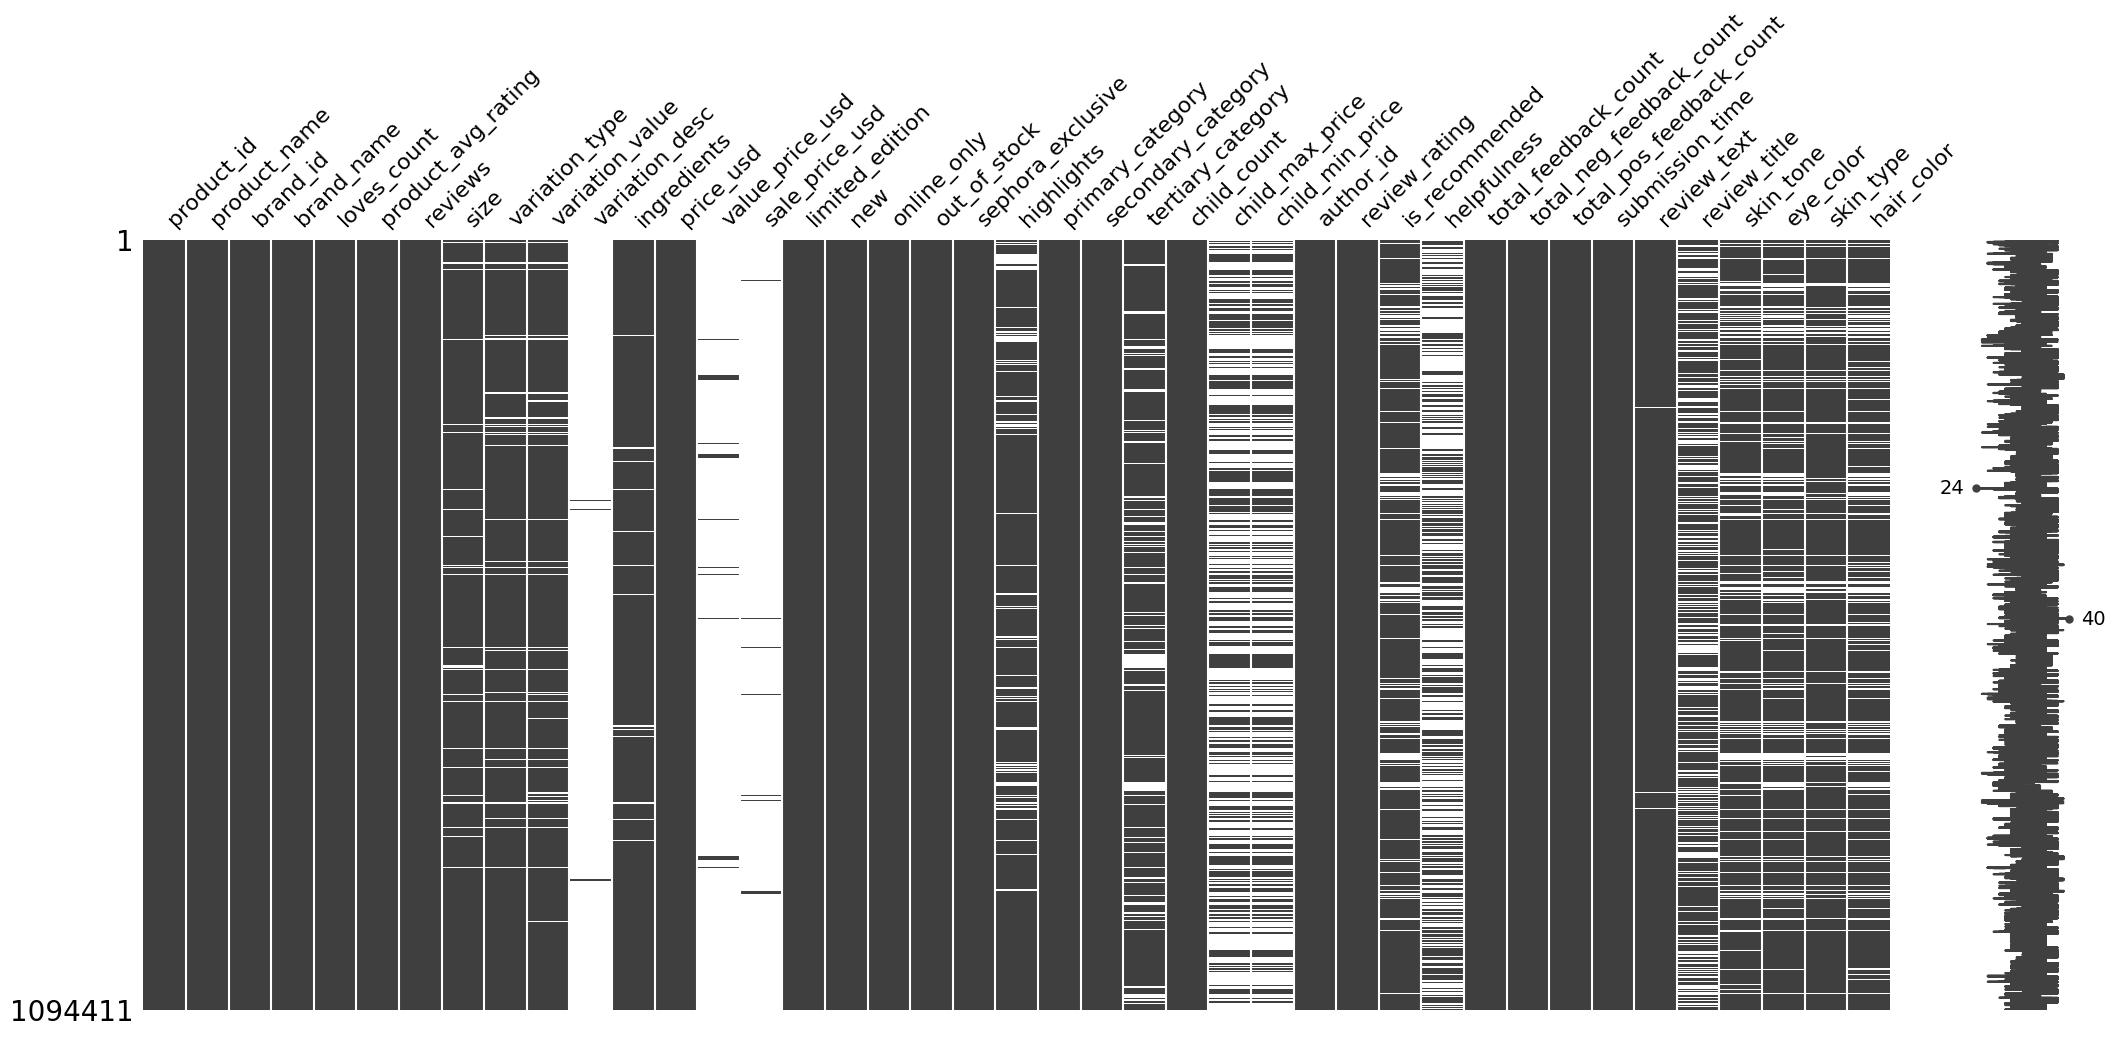

In [ ]:
import # YOUR CODE
msno.matrix(# YOUR CODE);

We can now drop the 3 columns with more than 95% missing values:

In [ ]:
merged_df.drop(# YOUR CODE)

Since we are just beginning our journey in EDA and data analysis, we will skip parts that involves complicated categorical variable encoding and natural language processing:

In [ ]:
merged_df.drop(columns=['highlights', 'tertiary_category','review_text','review_title'], inplace=True)

We could use the information about missing values to our advantage to organize our dataset. Before we move to remove or impute them, let's examine some of the columns with missing values.

#### `child`
From the data dictionary we can learn that `child_count` means "number of variations of the product". We can divide the dataframe into two parts: a) products with multiple variations and b) original products". This is an arbitrary choice, but we will do it as there are similar situations in different scenarios.

After some investigation, we can see that `child_count != 0` is equivalent to `child_max_price` and `child_min_price` is missing. We can use this as a filter to create a "child" DF and remove those 3 columns from the "original" DF. In that case, we have no more missing values associated with those products to deal with:

In [ ]:
child_df = merged_df[merged_df.child_count != 0].copy()  # copy() will create a deep copy of the DataFrame slice
child_df.shape

(453403, 34)

Now let's keep only the records where `child_count` is 0 in `merged_df` (original) and then remove the 3 columns associated with the products with multiple (`child_count`, `child_max_price`, `child_min_price`):

In [ ]:
merged_df = merged_df[merged_df.child_count == 0].copy()
merged_df.drop(columns=['child_count', 'child_max_price', 'child_min_price'], inplace=True)
merged_df.shape

(641008, 31)

#### `ingredients`

In [ ]:
merged_df[merged_df.ingredients.isna()].head(2)

,product_id,product_name,brand_id,brand_name,loves_count,product_avg_rating,reviews,size,variation_type,variation_value,...,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,skin_tone,eye_color,skin_type,hair_color
6851,P282935,Regenerative Anti-Aging Moisturizer,6018,Algenist,6807,4.2715,221.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,1.0,1.0,6,0,6,2022-01-17,fair,brown,combination,blonde
6852,P282935,Regenerative Anti-Aging Moisturizer,6018,Algenist,6807,4.2715,221.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,0.0,1.0,4,0,4,2021-04-13,lightMedium,brown,dry,brown


About 2% of the data has info here. Meaning these are products with ingridients listed, typically skincare, vitamins, etc. We can separate them into a new DF in case we wanted to study that DF later (this will ensure we won't impute some silly values for these products):

In [ ]:
skincare_df = merged_df[merged_df.ingredients.isna()].copy()
skincare_df.shape

(17176, 31)

In [ ]:
# dropping skincare products from the main DF
merged_df = merged_df[merged_df.ingredients.notna()].copy()
merged_df.shape

(623832, 31)

### ii. Dealing with null values
Now let's deal with the null values in the remaining dataframe:

In [ ]:
a = [print(f"{c:20}", f"{str(merged_df[c].dtype):8}", round(merged_df[c].isna().mean() * 100,1)) for c in merged_df.columns if merged_df[c].isna().mean() > 0]

size                 object   4.8
variation_type       object   7.6
variation_value      object   8.3
is_recommended       float64  12.4
helpfulness          float64  51.1
skin_tone            object   13.2
eye_color            object   16.2
skin_type            object   8.1
hair_color           object   18.0


From the printout, we can see that all attributes that have null values are categorical variables except is_recommended and helpfulness.

For the imputing categorical variables, we have a few different approaches:

1. Fill the null values with a guess. The guess could be a) random b) the most frequently appeared values c)  a value at the extreme end of the distribution of the variable. To give a few examples.
2. Fill the null values with a string to represent missing values (e.g., "unspecified").
3. Estimate the values using an algorithm such as ML.

For now, since none of the attribute's null value percentage is above 18 percent, let's proceed with option 2.

In [ ]:
values = {
    'size':            'unspecified',
    'variation_type':  'unspecified',
    'variation_value': 'unspecified',
    'size':            'unspecified',
    'skin_tone':       'unspecified',
    'eye_color':       'unspecified',
    'skin_type':       'unspecified',
    'hair_color':      'unspecified'
    }

merged_df.fillna(# YOUR CODE)

In [ ]:
a = [print(f"{c:20}", f"{str(merged_df[c].dtype):8}", round(merged_df[c].isna().mean() * 100,1)) for c in merged_df.columns if merged_df[c].isna().mean() > 0]

is_recommended       float64  12.4
helpfulness          float64  51.1


For the binary variable (`is_recommended`), we have a few different approaches:

1. Fill the null with the most frequently appeared values.
2. Estimate the values using an algorithm such as ML or probabilistic algorithm.
3. Fill with a logical value. For example, if `is_recommended` is missing, we can interpret that the user did not recommend the product.

An important note about these approaches is that regardless of which one we use, we are changing the underlying data, and this needs to be communicated clearly with the stakeholders.

For now, we can proceed with either 1 (an example solution using option 2 is given as an alternative).

In [ ]:
# Option 1
is_recommended_mode = merged_df['is_recommended'].mode()[0]  # Get the most frequent category
merged_df['is_recommended'].fillna(# YOUR CODE)

In [ ]:
# Option b
# prob_distribution = merged_df['is_recommended'].value_counts(normalize=True)

# merged_df['is_recommended'].fillna(
#     np.random.choice(prob_distribution.index, p=prob_distribution.values),
#     inplace=True
# )

For the numeric variable (`helpfulness`), we have a few different approaches:

1. Fill the null with the mode/mean/median or any other logical estimates.
2. Build an ML model to predict it.
3. Use a logical value. For instance, if revenue associated with a customer is missing it could mean revenue is equal to 0.

On reviewing the dataset source again, we notice that `helpfulness` is computed as `total_pos_feedback_count`\ `total_feedback_count`. Considering cases where `total_feedback_count` is 0, `helpfulness` would be undefined. In such instances, we can recompute `helpfulness`, replacing undefined values with 0.


In [ ]:
# Calculate 'helpfulness' for all rows, regardless of the value in 'total_feedback_count'
merged_df['helpfulness'] = # YOUR CODE

# Replace np.inf, -np.inf, and np.nan with 0
merged_df['helpfulness'].replace(# YOUR CODE)

Now, let's check again for any null values in the dataframe.

In [ ]:
# Check one more time for the null values
# YOUR CODE

product_id                  0.0
product_name                0.0
brand_id                    0.0
brand_name                  0.0
loves_count                 0.0
product_avg_rating          0.0
reviews                     0.0
size                        0.0
variation_type              0.0
variation_value             0.0
ingredients                 0.0
price_usd                   0.0
limited_edition             0.0
new                         0.0
online_only                 0.0
out_of_stock                0.0
sephora_exclusive           0.0
primary_category            0.0
secondary_category          0.0
author_id                   0.0
review_rating               0.0
is_recommended              0.0
helpfulness                 0.0
total_feedback_count        0.0
total_neg_feedback_count    0.0
total_pos_feedback_count    0.0
submission_time             0.0
skin_tone                   0.0
eye_color                   0.0
skin_type                   0.0
hair_color                  0.0
dtype: f

## 5. Data Visualization

Even though the data source has provided us with the cumulative mean rating for each product, we will ignore it for now, as there are slight differences between the mean calculated using the review files and the mean provided. Additionally, we want to practice grouping and aggregating ourselves.

For each graph in data visualization, multiple approaches can be taken to represent the data. The solution provided here is just one of the many possible instances.

Many of the plots in the provided solution employ a technique known as 'subplots,' which allows the inclusion of multiple graphs within a single output. The use of this technique is optional, and the choice to utilize it is entirely at your discretion.

### i. Top 10 Average Review Rating, Sum Love counts vs. Brand by Bar Charts

a. Perform Aggregation/Grouping

Hint: `loves_count` is per product and `rating` is per review.

In [ ]:
# Group review_rating by brand_name and calculate their means
rating_by_brand = # YOUR CODE

# Removing duplicate products and keeping one entry per product with its corresponding 'loves_count'
unique_products_df = # YOUR CODE

# Group loves_count by brand_name and calculate their sums
loves_by_brand = # YOUR CODE

b. Sort the resultant Dataframe and only keep the Top 10 values.

In [ ]:
# Use sort_values() & head()
top_avg_rating = # YOUR CODE
top_avg_loves = # YOUR CODE

c. Plot the Bar Charts

In [ ]:
# YOUR CODE FOR PLOT

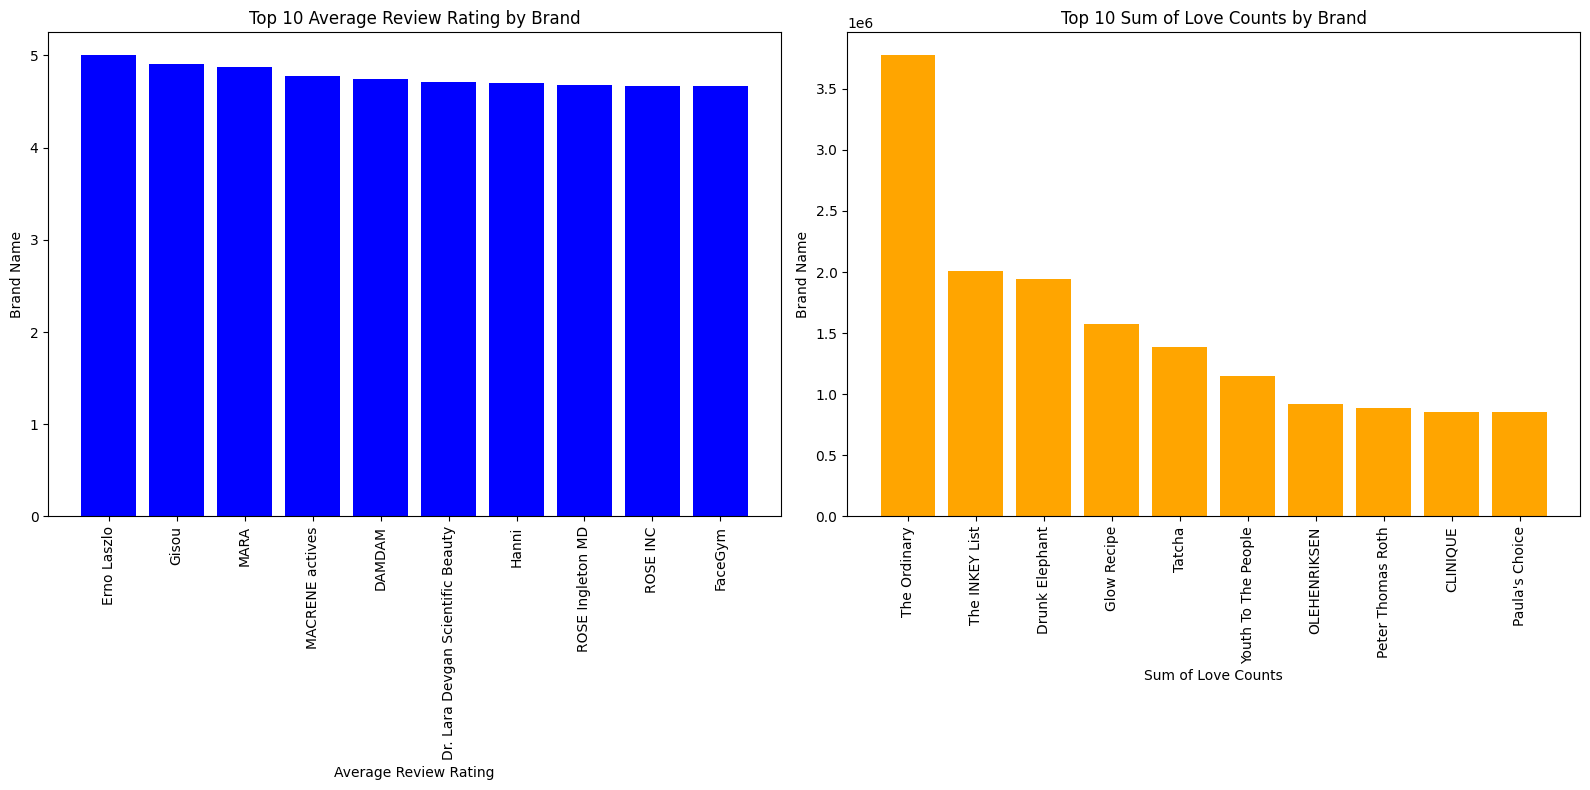

In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# # Plotting the bar chart for top 10 average review ratings by brand on the first subplot
# ax[0].bar(top_avg_rating.index, top_avg_rating.values, color='blue')
# ax[0].set_title('Top 10 Average Review Rating by Brand')
# ax[0].set_xlabel('Average Review Rating')
# ax[0].set_ylabel('Brand Name')
# ax[0].tick_params(axis='x', rotation=90)

# # Plotting the bar chart for top 10 sum of love counts by brand on the second subplot
# ax[1].bar(top_avg_loves.index, top_avg_loves.values, color='orange')
# ax[1].set_title('Top 10 Sum of Love Counts by Brand')
# ax[1].set_xlabel('Sum of Love Counts')
# ax[1].set_ylabel('Brand Name')
# ax[1].tick_params(axis='x', rotation=90)

# plt.tight_layout()

### ii. Distribution of Categories in Primary Category and Secondary Category by Pie Chart

a. Remove Duplicates

In [ ]:
# Removing duplicate products and keeping one entry per product
unique_products_df = # YOUR CODE

b.  Aggregate Data & Count Occurrence

In [ ]:
# Use .value_counts to find number of occurrence
primary_category_counts = # YOUR CODE
secondary_category_counts = # YOUR CODE

c. Plot the Pie Chart

In [ ]:
# YOUR CODE FOR PLOT

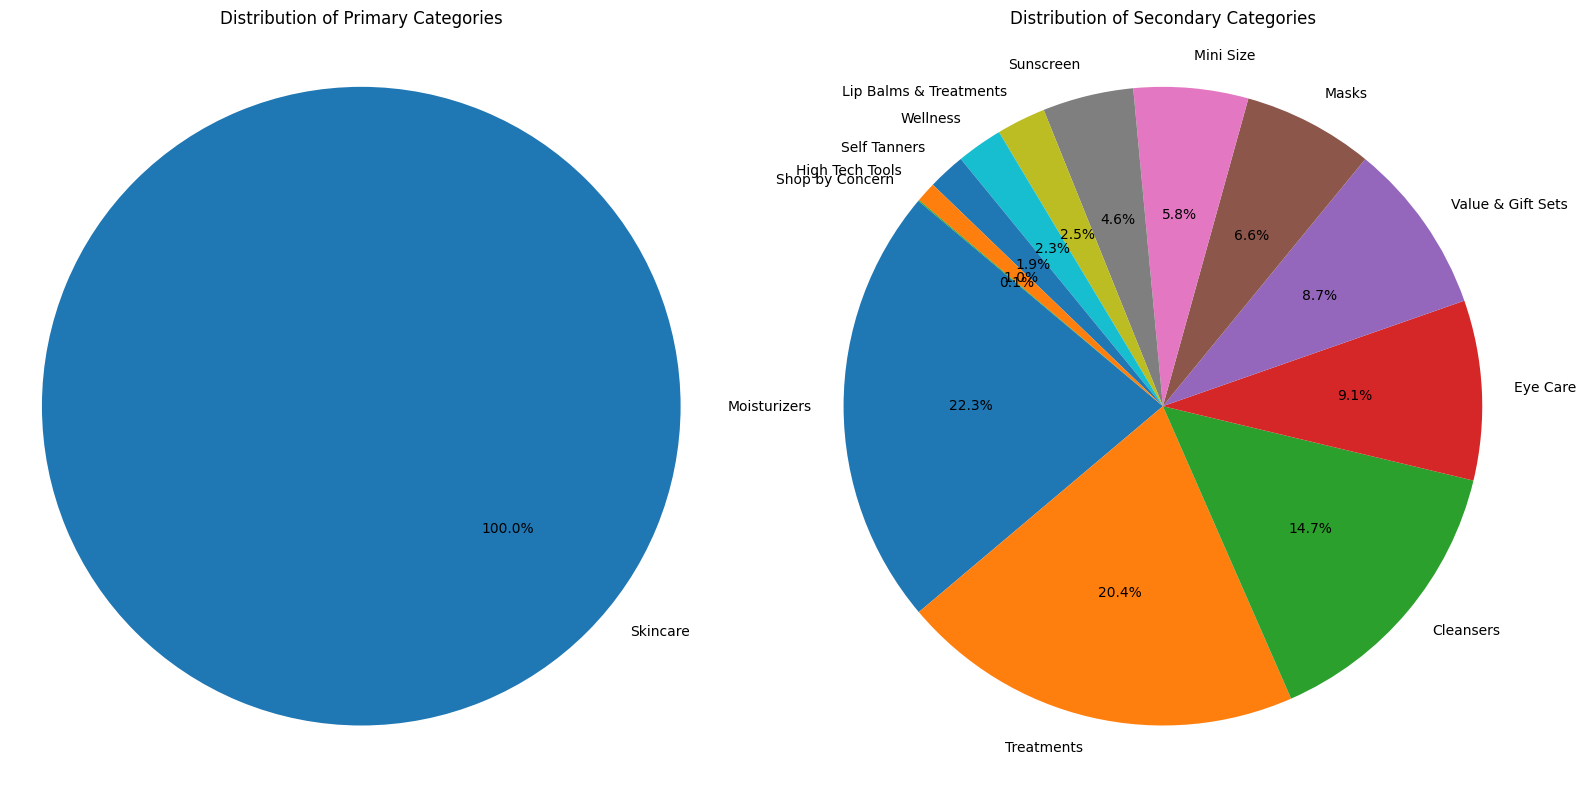

In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# # Plotting Pie Chart for Primary Category
# ax[0].pie(primary_category_counts, labels=primary_category_counts.index, autopct='%1.1f%%', startangle=140)
# ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# ax[0].set_title('Distribution of Primary Categories')

# # Plotting Pie Chart for Secondary Category
# ax[1].pie(secondary_category_counts, labels=secondary_category_counts.index, autopct='%1.1f%%', startangle=140)
# ax[1].axis('equal')
# ax[1].set_title('Distribution of Secondary Categories')

# plt.tight_layout()

### iii. Love count vs. Rating_review by Scatter Plot

a.  Create a new dataframe with `product_id`, mean review rating and `loves_count`

In [ ]:
# Group review_rating by product_id and calculate their means
rating_by_product_id = # YOUR CODE

In [ ]:
# Removing duplicate products and keeping one entry per product
unique_products_df = # YOUR CODE

In [ ]:
# Merging the DataFrames on 'product_id'
scatter_plot_df = # YOUR CODE

In [ ]:
scatter_plot_df

,product_id,loves_count,review_rating
0,P439055,33910,4.541257
1,P467602,17890,4.530648
2,P432045,44448,3.872111
3,P311143,27278,4.413386
4,P388200,9314,4.056886
...,...,...,...
1841,P501474,8989,4.875000
1842,P502998,10406,4.142857
1843,P503872,6510,4.833333
1844,P502977,13592,4.250000


b.  Plot the scatter plot

In [ ]:
# YOUR CODE FOR PLOT

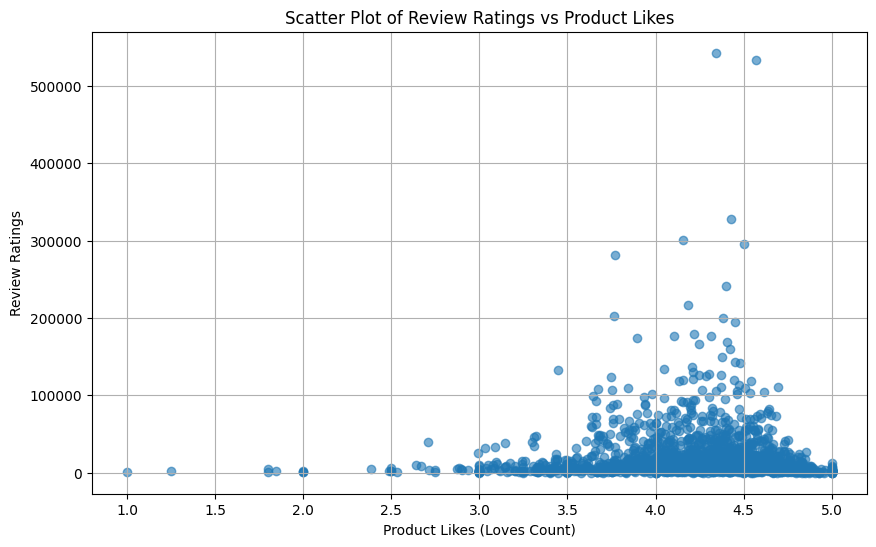

In [ ]:
# # Plotting the scatterplot
# plt.figure(figsize=(10,6))
# plt.scatter(scatter_plot_df['review_rating'],scatter_plot_df['loves_count'], alpha=0.6)
# plt.title('Scatter Plot of Review Ratings vs Product Likes')
# plt.xlabel('Product Likes (Loves Count)')
# plt.ylabel('Review Ratings')
# plt.grid(True)

### iv. Brand Price Distribution with top 10 Highest Median Price by Box Plots

a. Calculate the median price for each brand

In [ ]:
# Removing duplicate products and keeping one entry per product
unique_products_df = # YOUR CODE

In [ ]:
# Calculate the median grouped by brand_name
brand_mean_price = # YOUR CODE

b. Find the top 10 rand with highest median price and filter the original dataframe

In [ ]:
# Sort the brands by median price in descending order, select the top 10 and convert it to a list.

# Hint:
# You can use .tolist() to convert a dataframe's attribute to a list
# You can use .sort_values(xxx).head(xxx)['xxx'] to get the desired amount of top entries of an attribute

top_10_brands = # YOUR CODE

In [ ]:
# Filter the original DataFrame to include only the rows where the brand_name is one of the top 10 brands.

# Hint: use .isin() function
top_brands_df = # YOUR CODE

c. Plot the chart

In [ ]:
# YOUR CODE FOR PLOT

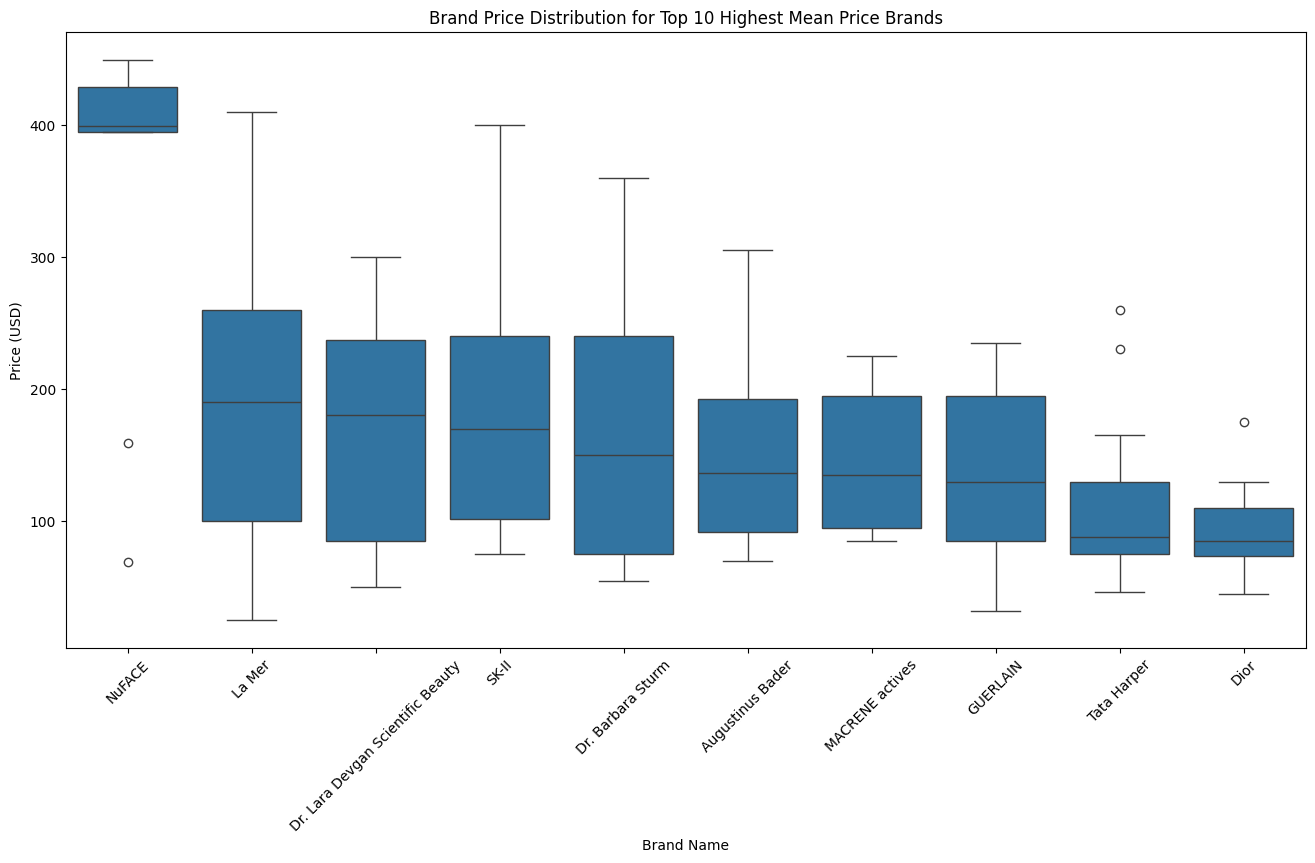

In [ ]:
# Plot the box plots for each of the top 10 brands.
# plt.figure(figsize=(16, 8))
# sns.boxplot(x='brand_name', y='price_usd', data=top_brands_df, order=top_10_brands)
# plt.xticks(rotation=45)
# plt.title('Brand Price Distribution for Top 10 Highest Mean Price Brands')
# plt.xlabel('Brand Name')
# plt.ylabel('Price (USD)')

### v. Number of Review by Days in a Week and Months in a Year by Bar Chart

In [ ]:
merged_df['submission_time']

0          2023-02-09
1          2023-01-13
2          2022-12-09
3          2022-12-01
4          2022-11-07
              ...    
1094406    2023-01-24
1094407    2022-11-08
1094408    2023-02-17
1094409    2023-02-03
1094410    2023-01-22
Name: submission_time, Length: 1094411, dtype: object

a. Count Number of Reviews by Days in a Week and Months in a Year

In [ ]:
# Convert the Variable Type pd.to_datetime()
merged_df['submission_time'] = # YOUR CODE

In [ ]:
# Extract day of the week and month of the year

# Hint: .dt.day_name() & .dt.month_name()
merged_df['day_of_week'] = # YOUR CODE
merged_df['month'] = # YOUR CODE

In [ ]:
# Count Number of Reviews by Days in a Week and Months in a Year
reviews_by_day = merged_df.groupby('day_of_week').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
reviews_by_month = merged_df.groupby('month').size().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

b. Plot the Graph

In [ ]:
# YOUR CODE FOR PLOT

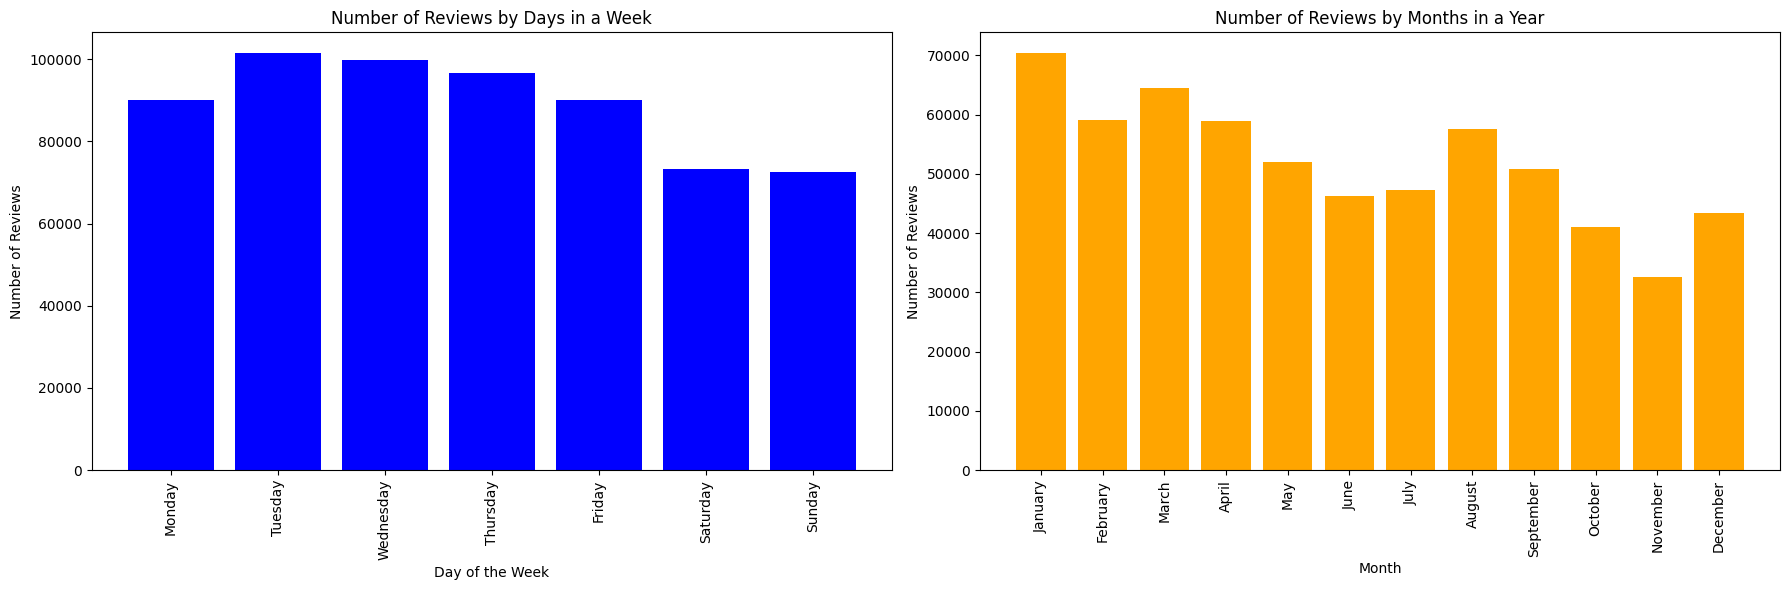

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# # Bar chart for Days of the Week
# ax[0].bar(reviews_by_day.index, reviews_by_day.values, color='blue')
# ax[0].set_title('Number of Reviews by Days in a Week')
# ax[0].set_xlabel('Day of the Week')
# ax[0].set_ylabel('Number of Reviews')
# ax[0].tick_params(axis='x', rotation=90)

# # Bar chart for Months of the Year
# ax[1].bar(reviews_by_month.index, reviews_by_month.values, color='orange')
# ax[1].set_title('Number of Reviews by Months in a Year')
# ax[1].set_xlabel('Month')
# ax[1].set_ylabel('Number of Reviews')
# ax[1].tick_params(axis='x', rotation=90)


# plt.tight_layout()

### vi. Number of Review by Date by Line Charts

a. Group by `submission_time`

In [ ]:
reviews_by_date = # YOUR CODE

b. Plot the line chart

In [ ]:
# YOUR CODE FOR PLOT

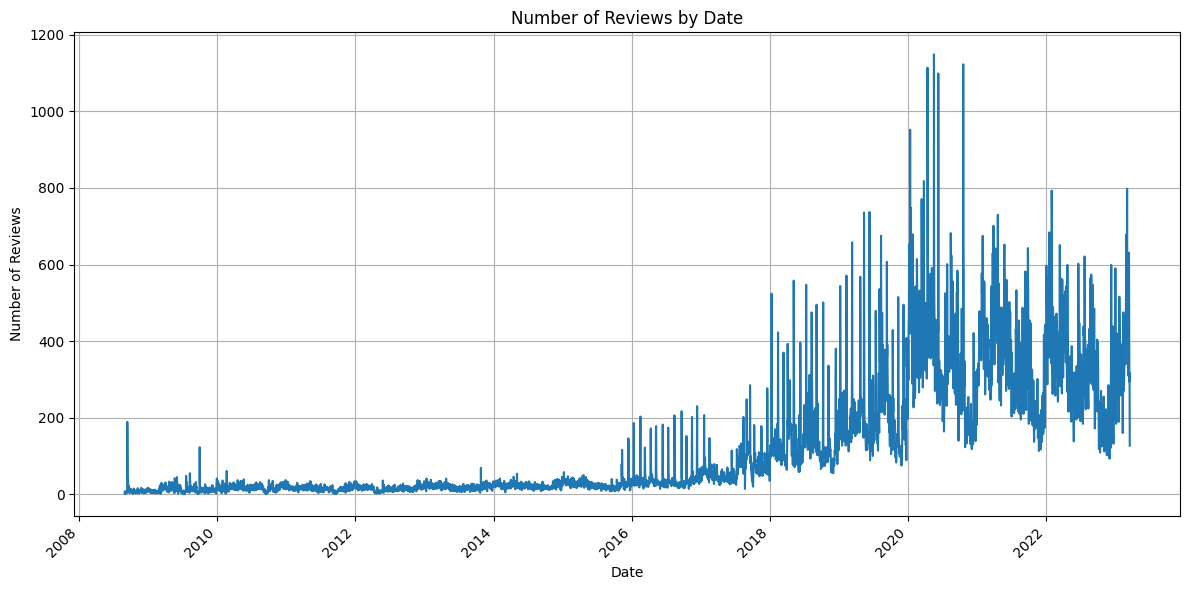

In [ ]:
# Plotting Line Chart
# plt.figure(figsize=(12,6))
# reviews_by_date.plot(kind='line')
# plt.title('Number of Reviews by Date')
# plt.xlabel('Date')
# plt.ylabel('Number of Reviews')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()

From the plot, we can centainly see the surge of number of commennts when the COVID pandamic started.

### vii. Continued from v: Let's Narrow it down from 2018 till Present and Group by Month in each Year

a. Filtering and extracting the data

In [ ]:
# Filter the data that we only include data after 2018-01-01
filtered_df = # YOUR CODE

In [ ]:
# Extract the year_month data

# Hint: use function .to_period('M')
filtered_df['year_month'] = # YOUR CODE

<ipython-input-110-a175f8675000>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year_month'] = filtered_df['submission_time'].dt.to_period('M').copy()


b. Group by `year_month` and count the number of reviews

In [ ]:
reviews_by_month_year = # YOUR CODE

In [ ]:
# YOUR CODE FOR PLOT

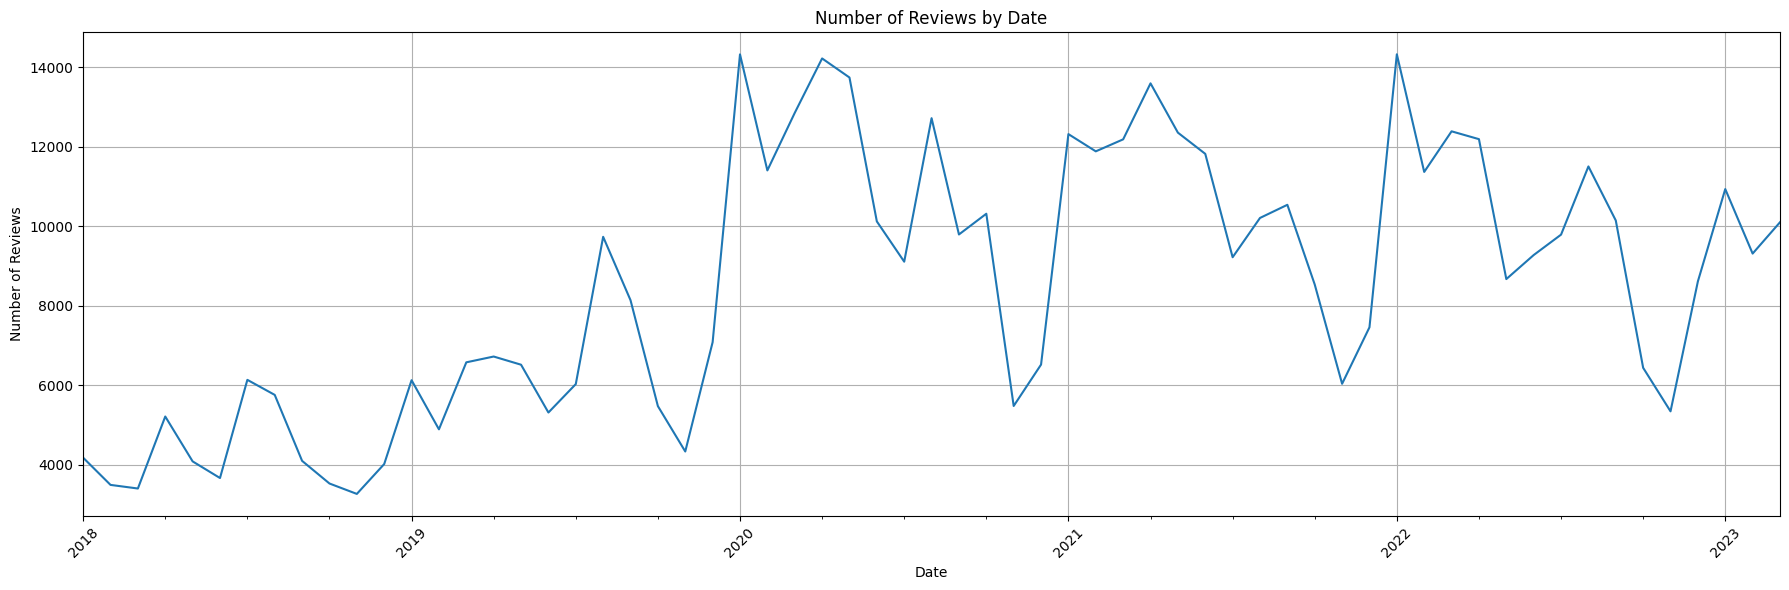

In [ ]:
# plt.figure(figsize=(18,6))
# reviews_by_month_year.plot(kind='line')
# plt.title('Number of Reviews by Date')
# plt.xlabel('Date')
# plt.ylabel('Number of Reviews')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()

From the graph, we can certainly identify some patterns:
1. The number of comments tends to drop to its lowest in November and December, followed by a rapid increase in January of the next year.
2. Such a pattern seems to hold true across various years, indicating the cyclical nature of e-business, indicating the cyclic nature of e-business.

### viii. Review Writer Demographic

a. Plot the Bar Chart

In [ ]:
# For better representation, you can use
# labels=['']*len(demographic_df['skin_tone'].unique())
# to assign label to an empty list to avoid overlaid labels on the chart.

# Make sure you add
# axs[0, 0].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), labels=demographic_df['skin_tone'].unique())
# to create a legend with corresponding color.

In [ ]:
# YOUR CODE FOR PLOT

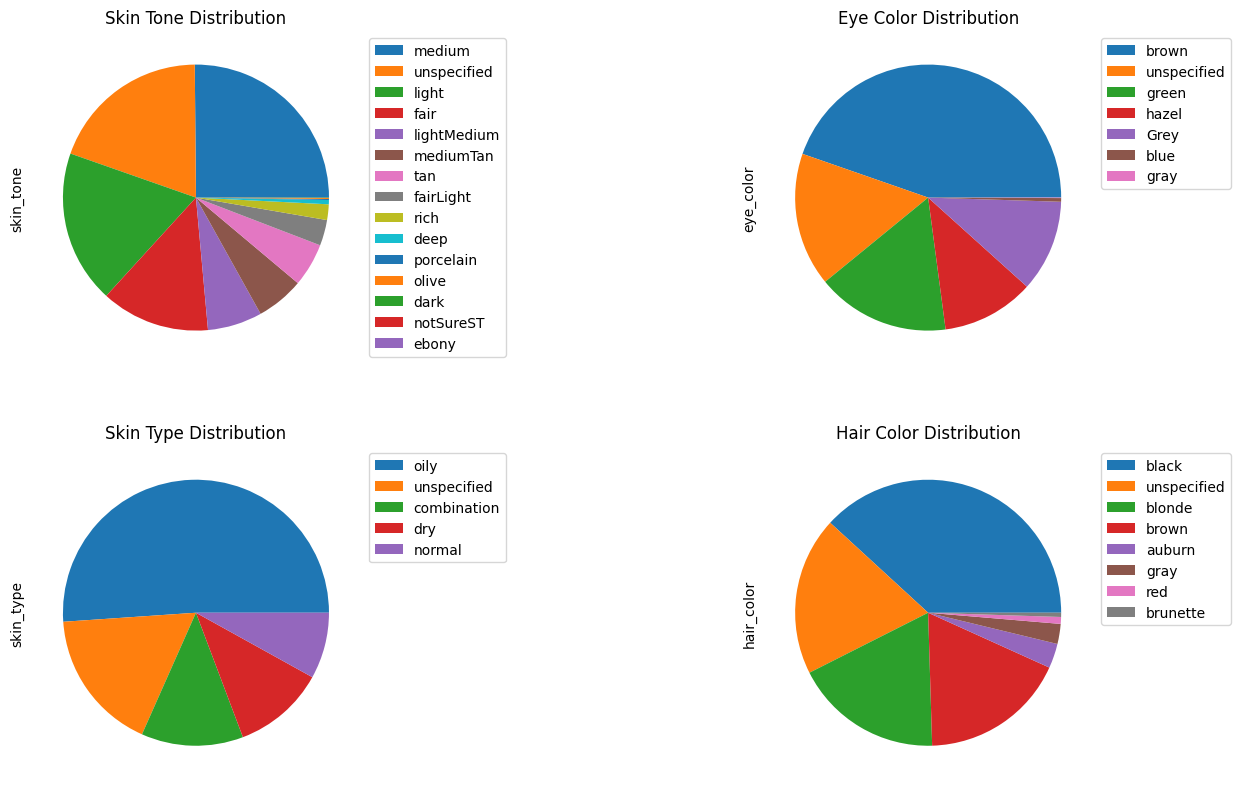

In [ ]:
# fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# # Skin Tone
# merged_df['skin_tone'].value_counts().plot(kind='pie', ax=axs[0, 0], labels=['']*len(merged_df['skin_tone'].unique()))
# axs[0, 0].set_title('Skin Tone Distribution')
# axs[0, 0].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), labels=merged_df['skin_tone'].unique())

# # Eye Color
# merged_df['eye_color'].value_counts().plot(kind='pie', ax=axs[0, 1], labels=['']*len(merged_df['eye_color'].unique()))
# axs[0, 1].set_title('Eye Color Distribution')
# axs[0, 1].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), labels=merged_df['eye_color'].unique())

# # Skin Type
# merged_df['skin_type'].value_counts().plot(kind='pie', ax=axs[1, 0], labels=['']*len(merged_df['skin_type'].unique()))
# axs[1, 0].set_title('Skin Type Distribution')
# axs[1, 0].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), labels=merged_df['skin_type'].unique())

# # Hair Color
# merged_df['hair_color'].value_counts().plot(kind='pie', ax=axs[1, 1], labels=['']*len(merged_df['hair_color'].unique()))
# axs[1, 1].set_title('Hair Color Distribution')
# axs[1, 1].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), labels=merged_df['hair_color'].unique())

# # Adjust the layout to prevent overlap
# plt.tight_layout()

### ix. The % difference between the mean rating of every review and the mean rating, grouped by every demographic characteristic (FINAL EXERCISE!)

(Do one characteristic if you have difficulties creating four simultaneously)

a. Create four empty `df` and a list with four different demographic characteristic

In [ ]:
skin_tone_df = []
eye_color_df = []
skin_type_df = []
hair_color_df = []

demographic_columns = ['skin_tone', 'eye_color', 'skin_type', 'hair_color']

b. Create corresponding dataframes

In [ ]:
# 1. Find the means grouped by each characteristic
# 2. Calculate characteristic means and overall means % differences
# 3. Put characteristic means and overall means % differences in their corresponding dataframes

# YOUR CODE

In [ ]:
# for col in demographic_columns:
#     mean_rating = merged_df.groupby(col)['review_rating'].mean().reset_index()
#     mean_rating.columns = [col, f'{col}_mean_rating']
#     mean_rating[f'{col}_rating_diff'] = (mean_rating[f'{col}_mean_rating'] - merged_df['review_rating'].mean())/merged_df['review_rating'].mean()*100

#     if col == 'skin_tone':
#         skin_tone_df = mean_rating
#     elif col == 'eye_color':
#         eye_color_df = mean_rating
#     elif col == 'skin_type':
#         skin_type_df = mean_rating
#     elif col == 'hair_color':
#         hair_color_df = mean_rating

c. Plot the charts

In [ ]:
# YOUR CODE FOR PLOT

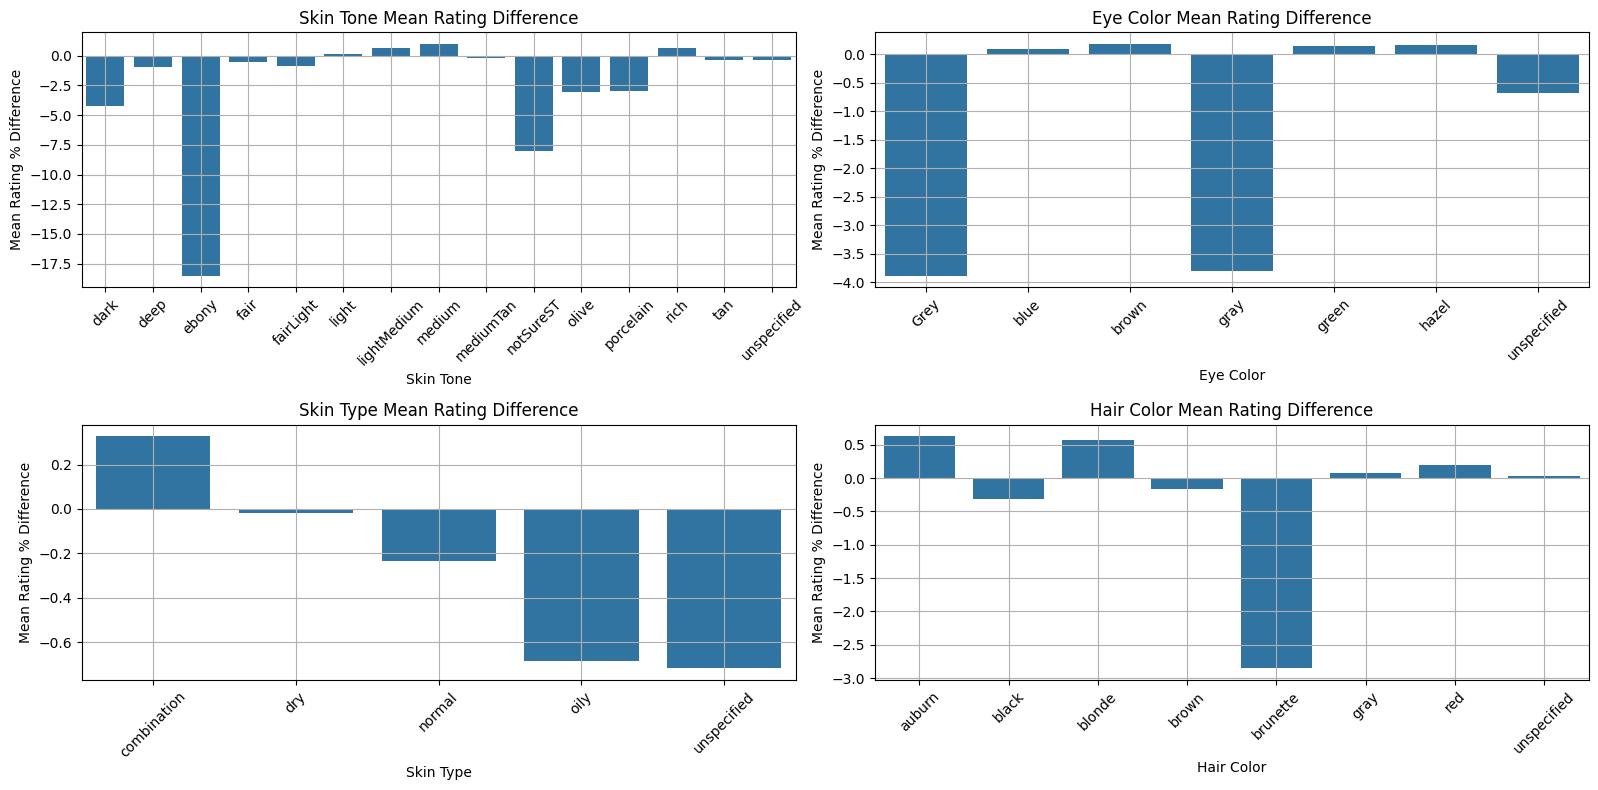

In [ ]:
# fig, axs = plt.subplots(2, 2, figsize=(16, 8))
# plt.subplots_adjust(hspace=0.8)

# # Bar plot for skin_tone_df
# sns.barplot(x='skin_tone', y='skin_tone_rating_diff', data=skin_tone_df, ax=axs[0, 0])
# axs[0, 0].set_title('Skin Tone Mean Rating Difference')
# axs[0, 0].set_ylabel('Mean Rating % Difference')
# axs[0, 0].set_xlabel('Skin Tone')
# axs[0, 0].grid(True)
# axs[0, 0].tick_params(axis='x', rotation=45)

# # Bar plot for eye_color_df
# sns.barplot(x='eye_color', y='eye_color_rating_diff', data=eye_color_df, ax=axs[0, 1])
# axs[0, 1].set_title('Eye Color Mean Rating Difference')
# axs[0, 1].set_ylabel('Mean Rating % Difference')
# axs[0, 1].set_xlabel('Eye Color')
# axs[0, 1].grid(True)
# axs[0, 1].tick_params(axis='x', rotation=45)

# # Bar plot for skin_type_df
# sns.barplot(x='skin_type', y='skin_type_rating_diff', data=skin_type_df, ax=axs[1, 0])
# axs[1, 0].set_title('Skin Type Mean Rating Difference')
# axs[1, 0].set_ylabel('Mean Rating % Difference')
# axs[1, 0].set_xlabel('Skin Type')
# axs[1, 0].grid(True)
# axs[1, 0].tick_params(axis='x', rotation=45)

# # Bar plot for hair_color_df
# sns.barplot(x='hair_color', y='hair_color_rating_diff', data=hair_color_df, ax=axs[1, 1])
# axs[1, 1].set_title('Hair Color Mean Rating Difference')
# axs[1, 1].set_ylabel('Mean Rating % Difference')
# axs[1, 1].set_xlabel('Hair Color')
# axs[1, 1].grid(True)
# axs[1, 1].tick_params(axis='x', rotation=45)